In [142]:
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_rows = 450

In [30]:
TestPW = pd.read_csv("TestWaves.csv", header=None)

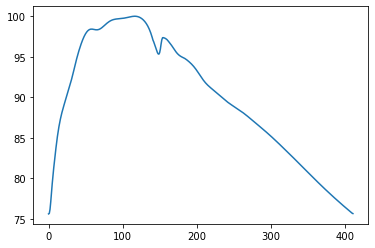

In [32]:
plt.plot(TestPW[20])
plt.show()

In [129]:
#define wave (initially using perfect test wave)
wave = TestPW[20]
wave

0       75.592140
1       75.653001
2       76.157123
3       77.113506
4       78.254394
5       79.359281
6       80.360666
7       81.275048
8       82.131679
9       82.950059
10      83.739188
11      84.489317
12      85.180943
13      85.804318
14      86.360942
15      86.860564
16      87.312185
17      87.723304
18      88.099173
19      88.446541
20      88.773659
21      89.089527
22      89.399394
23      89.704761
24      90.006378
25      90.307995
26      90.612612
27      90.920979
28      91.232346
29      91.547464
30      91.868581
31      92.200949
32      92.548317
33      92.912936
34      93.289555
35      93.672174
36      94.052543
37      94.423912
38      94.781780
39      95.124648
40      95.451016
41      95.760883
42      96.055750
43      96.337116
44      96.604233
45      96.857848
46      97.095714
47      97.317079
48      97.521194
49      97.705058
50      97.868671
51      98.010534
52      98.131397
53      98.230509
54      98.309370
55      98

In [130]:
#identifying first 3 indexes
beg = 0
end = len(wave) - 1
sysMaxi = wave.idxmax()

In [48]:
#pp_pres
pp_pres = sum(wave)
pp_pres

37021.28253218001

In [73]:
#avg_sys_rise
avg_sys_rise = wave[0:sysMaxi].mean()
avg_sys_rise

94.88119034444443

In [70]:
#sys_rise_area
sys_rise_area = sum(wave[0:sysMaxi])
sys_rise_area

11101.0992703

In [74]:
#t_sys_rise
t_sys_rise = sysMaxi
t_sys_rise

117

In [80]:
#avg_dec
avg_dec = wave[sysMaxi:end].mean()
avg_dec

87.86502800637285

In [83]:
#t_dec
t_dec = end - sysMaxi
t_dec

295

In [82]:
#dec_area
dec_area = sum(wave[sysMaxi:end])
dec_area

25920.183261879993

In [101]:
#setting bounds for finding dicrotic notch and diastolic pressure
diff = wave.diff()
upperBound = round(sysMaxi + .3125*len(wave))

In [106]:
#dicrotic notch
for i in range(sysMaxi+1,upperBound):
    if diff[i] > 0 and diff[i+1] > 0:
        break
dicNotch = i
dicNotch

150

In [108]:
#diastolic pressure
for i in range(dicNotch+1,upperBound):
    if diff[i] < 0 and diff[i+1] < 0:
        break
diaP = i
diaP

156

In [110]:
#avg_sys
avg_sys = wave[beg:dicNotch].mean()
avg_sys

95.65239824553333

In [113]:
#slope_sys
slope_sys = (wave[dicNotch] - wave[0]) / dicNotch
slope_sys

0.13286781079999999

In [114]:
#sys_area
sys_area = sum(wave[0:dicNotch])
sys_area

14347.85973683

In [115]:
#t_sys
t_sys = dicNotch
t_sys

150

In [116]:
#avg_sys_dec
avg_sys_dec = wave[sysMaxi:dicNotch].mean()
avg_sys_dec

98.38668080393938

In [118]:
#dn_sys
dn_sys = wave[sysMaxi] - wave[dicNotch]
dn_sys

4.506999579999999

In [119]:
#sys_dec_area
sys_dec_area = sum(wave[sysMaxi:dicNotch])
sys_dec_area

3246.7604665299996

In [120]:
#t_sys_dec
t_sys_dec = dicNotch - sysMaxi
t_sys_dec

33

In [122]:
#avg_sys_dec_nodia
avg_sys_dec_nodia = avg_sys_dec - wave[diaP]
avg_sys_dec_nodia

1.0306666139393883

In [124]:
#avg_sys_nodia
avg_sys_nodia = avg_sys - wave[diaP]
avg_sys_nodia

-1.7036159444666623

In [125]:
#avg_sys_rise_nodia
avg_sys_rise_nodia = avg_sys_rise - wave[diaP]
avg_sys_rise_nodia

-2.4748238455555622

In [126]:
#avg_dec_nodia
avg_dec_nodia = avg_dec - wave[diaP]
avg_dec_nodia

-9.490986183627143

In [133]:
#slope_dia
slope_dia = (wave[end] - wave[dicNotch]) / (end - dicNotch)
slope_dia

-0.07619701360153251

In [134]:
#t_dia
t_dia = end - dicNotch
t_dia

261

In [136]:
#avg_dia
avg_dia = wave[dicNotch:end].mean()
avg_dia

86.5815628524138

In [139]:
#dn_dia
dn_dia = wave[diaP] - wave[dicNotch]
dn_dia

1.8337027700000021

In [141]:
#avg_sys_nodia
avg_sys_nodia = avg_sys - wave[diaP]
avg_sys_nodia

-1.7036159444666623